Dataset: ExpW (Expression in-the-Wild Database)

O ExpW é um dataset de larga escala, "in-the-wild", projetado para o reconhecimento de expressões faciais em cenários realistas e não controlados. Foi construído a partir de imagens coletadas de motores de busca, com uma subsequente camada de anotação humana para rotular os rostos e as emoções. Diferente da RAF-DB, o ExpW não possui uma divisão oficial de treino/teste, exigindo a criação manual dessa separação.

Principais Características
Composição: O dataset completo contém 91.793 imagens. Através de um script de organização, os dados foram divididos de forma estratificada em:

Conjunto de Treino: 73.434 imagens (80%)
Conjunto de Teste: 18.359 imagens (20%)

Qualidade e Consistência: Por ser coletado da internet, a qualidade das imagens é variável (média a alta). A inspeção visual revelou uma enorme diversidade de poses, ângulos de câmera, condições de iluminação e oclusões parciais, tornando-o um excelente campo de provas para a robustez dos modelos.

Classes de Emoção: O dataset é rotulado com as mesmas 7 emoções básicas universais, o que garante compatibilidade direta com os outros datasets do projeto:
Felicidade
Tristeza
Surpresa
Raiva
Nojo
Medo
Neutro

In [5]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image
import random

# Configurações para os gráficos
sns.set_theme(style="whitegrid")
%matplotlib inline

print("Bibliotecas importadas com sucesso!")

Bibliotecas importadas com sucesso!


In [6]:
# Caminho para a pasta principal do dataset organizado
PATH_EXPW_ORGANIZED = r'C:\Users\luhal\TCC\data\processed\ExpW_organized'

print("Lendo a estrutura de pastas do ExpW organizado...")

# Lista para guardar as informações de cada imagem
expw_data = []

# Percorrer as pastas 'train' e 'test'
for split in ['train', 'test']:
    split_path = os.path.join(PATH_EXPW_ORGANIZED, split)
    if not os.path.isdir(split_path):
        continue
        
    # Percorrer cada pasta de emoção (ex: 'Felicidade', 'Raiva')
    for emotion_name in os.listdir(split_path):
        emotion_path = os.path.join(split_path, emotion_name)
        if not os.path.isdir(emotion_path):
            continue
            
        # Listar todas as imagens dentro da pasta da emoção
        for image_filename in os.listdir(emotion_path):
            expw_data.append({
                'split': split,
                'emotion_name': emotion_name,
                'image_filename': image_filename
            })

# Criar o DataFrame do pandas
df_expw_org = pd.DataFrame(expw_data)

print(f"\nTotal de {len(df_expw_org)} imagens catalogadas.")
print("Amostra do DataFrame criado:")
display(df_expw_org.head())

Lendo a estrutura de pastas do ExpW organizado...

Total de 78389 imagens catalogadas.
Amostra do DataFrame criado:


,split,emotion_name,image_filename
0,train,Felicidade,afraid_asian_103.jpg
1,train,Felicidade,afraid_european_980.jpg
2,train,Felicidade,afraid_girl_39.jpg
3,train,Felicidade,afraid_teacher_360.jpg
4,train,Felicidade,afraid_woman_214.jpg


In [7]:
# Contar as imagens em cada divisão (treino e teste)
split_counts = df_expw_org['split'].value_counts()

print("--- Resumo Quantitativo do Dataset ExpW ---")
print(f"Total de Imagens: {len(df_expw_org)}")
print("-" * 45)
print(f"Imagens de Treino: {split_counts.get('train', 0)}")
print(f"Imagens de Teste:  {split_counts.get('test', 0)}")
print("-" * 45)

--- Resumo Quantitativo do Dataset ExpW ---
Total de Imagens: 78389
---------------------------------------------
Imagens de Treino: 61287
Imagens de Teste:  17102
---------------------------------------------


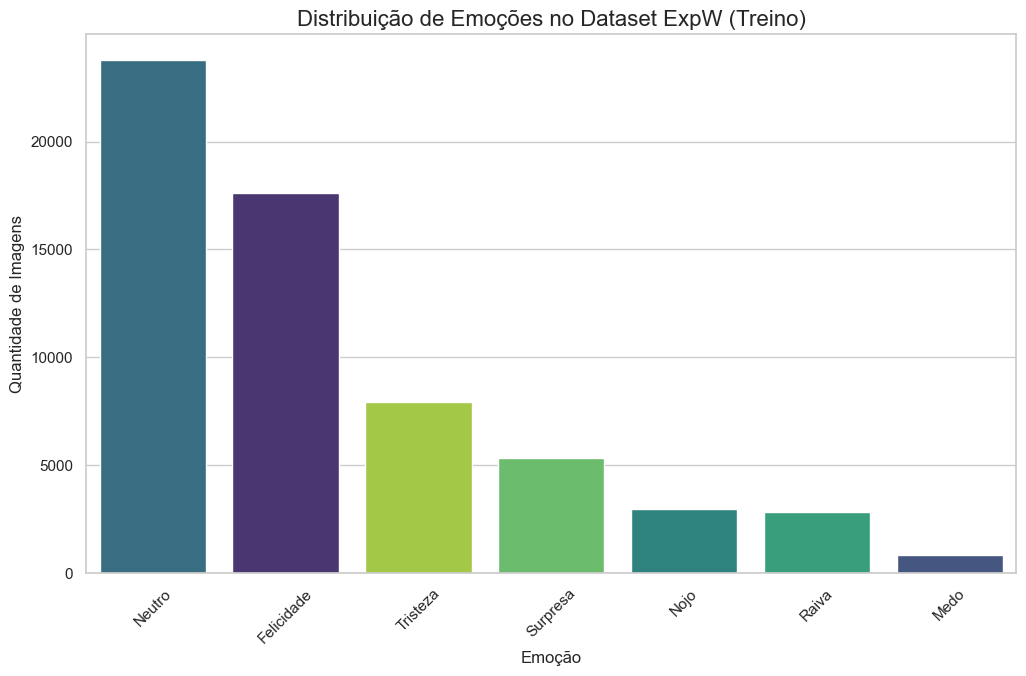

In [8]:
# Filtrar apenas os dados de treino para a contagem
train_df_expw = df_expw_org[df_expw_org['split'] == 'train']

# Criar o gráfico
plt.figure(figsize=(12, 7))
sns.countplot(x='emotion_name', 
              data=train_df_expw, 
              order=train_df_expw['emotion_name'].value_counts().index, 
              palette='viridis',
              hue='emotion_name',
              legend=False)

plt.title('Distribuição de Emoções no Dataset ExpW (Treino)', fontsize=16)
plt.xlabel('Emoção', fontsize=12)
plt.ylabel('Quantidade de Imagens', fontsize=12)
plt.xticks(rotation=45)
plt.show()

Exibindo amostras de 'Felicidade' do ExpW:


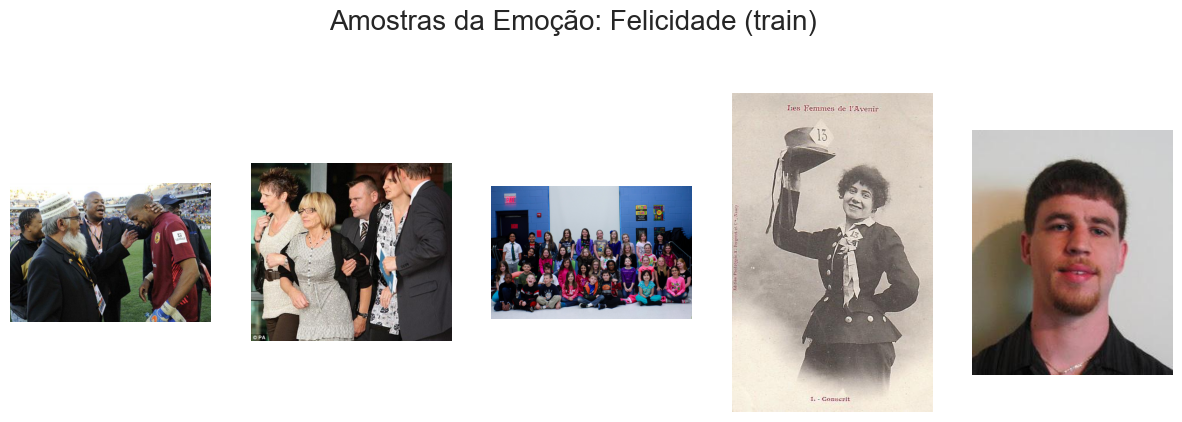

In [9]:
def show_sample_images_organized(emotion_name, n_samples=5, split='train'):
    """Função para exibir imagens do dataset já organizado em pastas."""
    
    # Filtra o dataframe para a emoção e o split desejado
    sample_df = df_expw_org[(df_expw_org['emotion_name'] == emotion_name) & (df_expw_org['split'] == split)].sample(n_samples)
    
    plt.figure(figsize=(15, 5))
    plt.suptitle(f'Amostras da Emoção: {emotion_name} ({split})', fontsize=20)
    
    for i, row in enumerate(sample_df.itertuples(), 1):
        # Constrói o caminho completo da imagem
        image_path = os.path.join(PATH_EXPW_ORGANIZED, row.split, row.emotion_name, row.image_filename)
        
        try:
            # Abrir a imagem com a Pillow
            image = Image.open(image_path).convert('RGB')
            
            # Exibir a imagem
            plt.subplot(1, n_samples, i)
            plt.imshow(image)
            plt.axis('off')

        except Exception as e:
            print(f"Não foi possível ler ou processar a imagem: {row.image_filename}. Erro: {e}")
        
    plt.show()

# --- Testar a função ---
print("Exibindo amostras de 'Felicidade' do ExpW:")
show_sample_images_organized('Felicidade')